# Use with PyGMT
Here we demonstrate how to use the figure output from `maps.plot_grd()` with normal PyGMT commands. 

Import the modules

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch

Fetch the datasets, bedmap2 surface topography and LIMA satellite imagery

In [2]:
imagery = fetch.imagery()

surface = fetch.bedmap2(layer="surface")

returning original grid


C:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_dev\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


gmtset [WARNING]: Representation of font type not recognized. Using default.


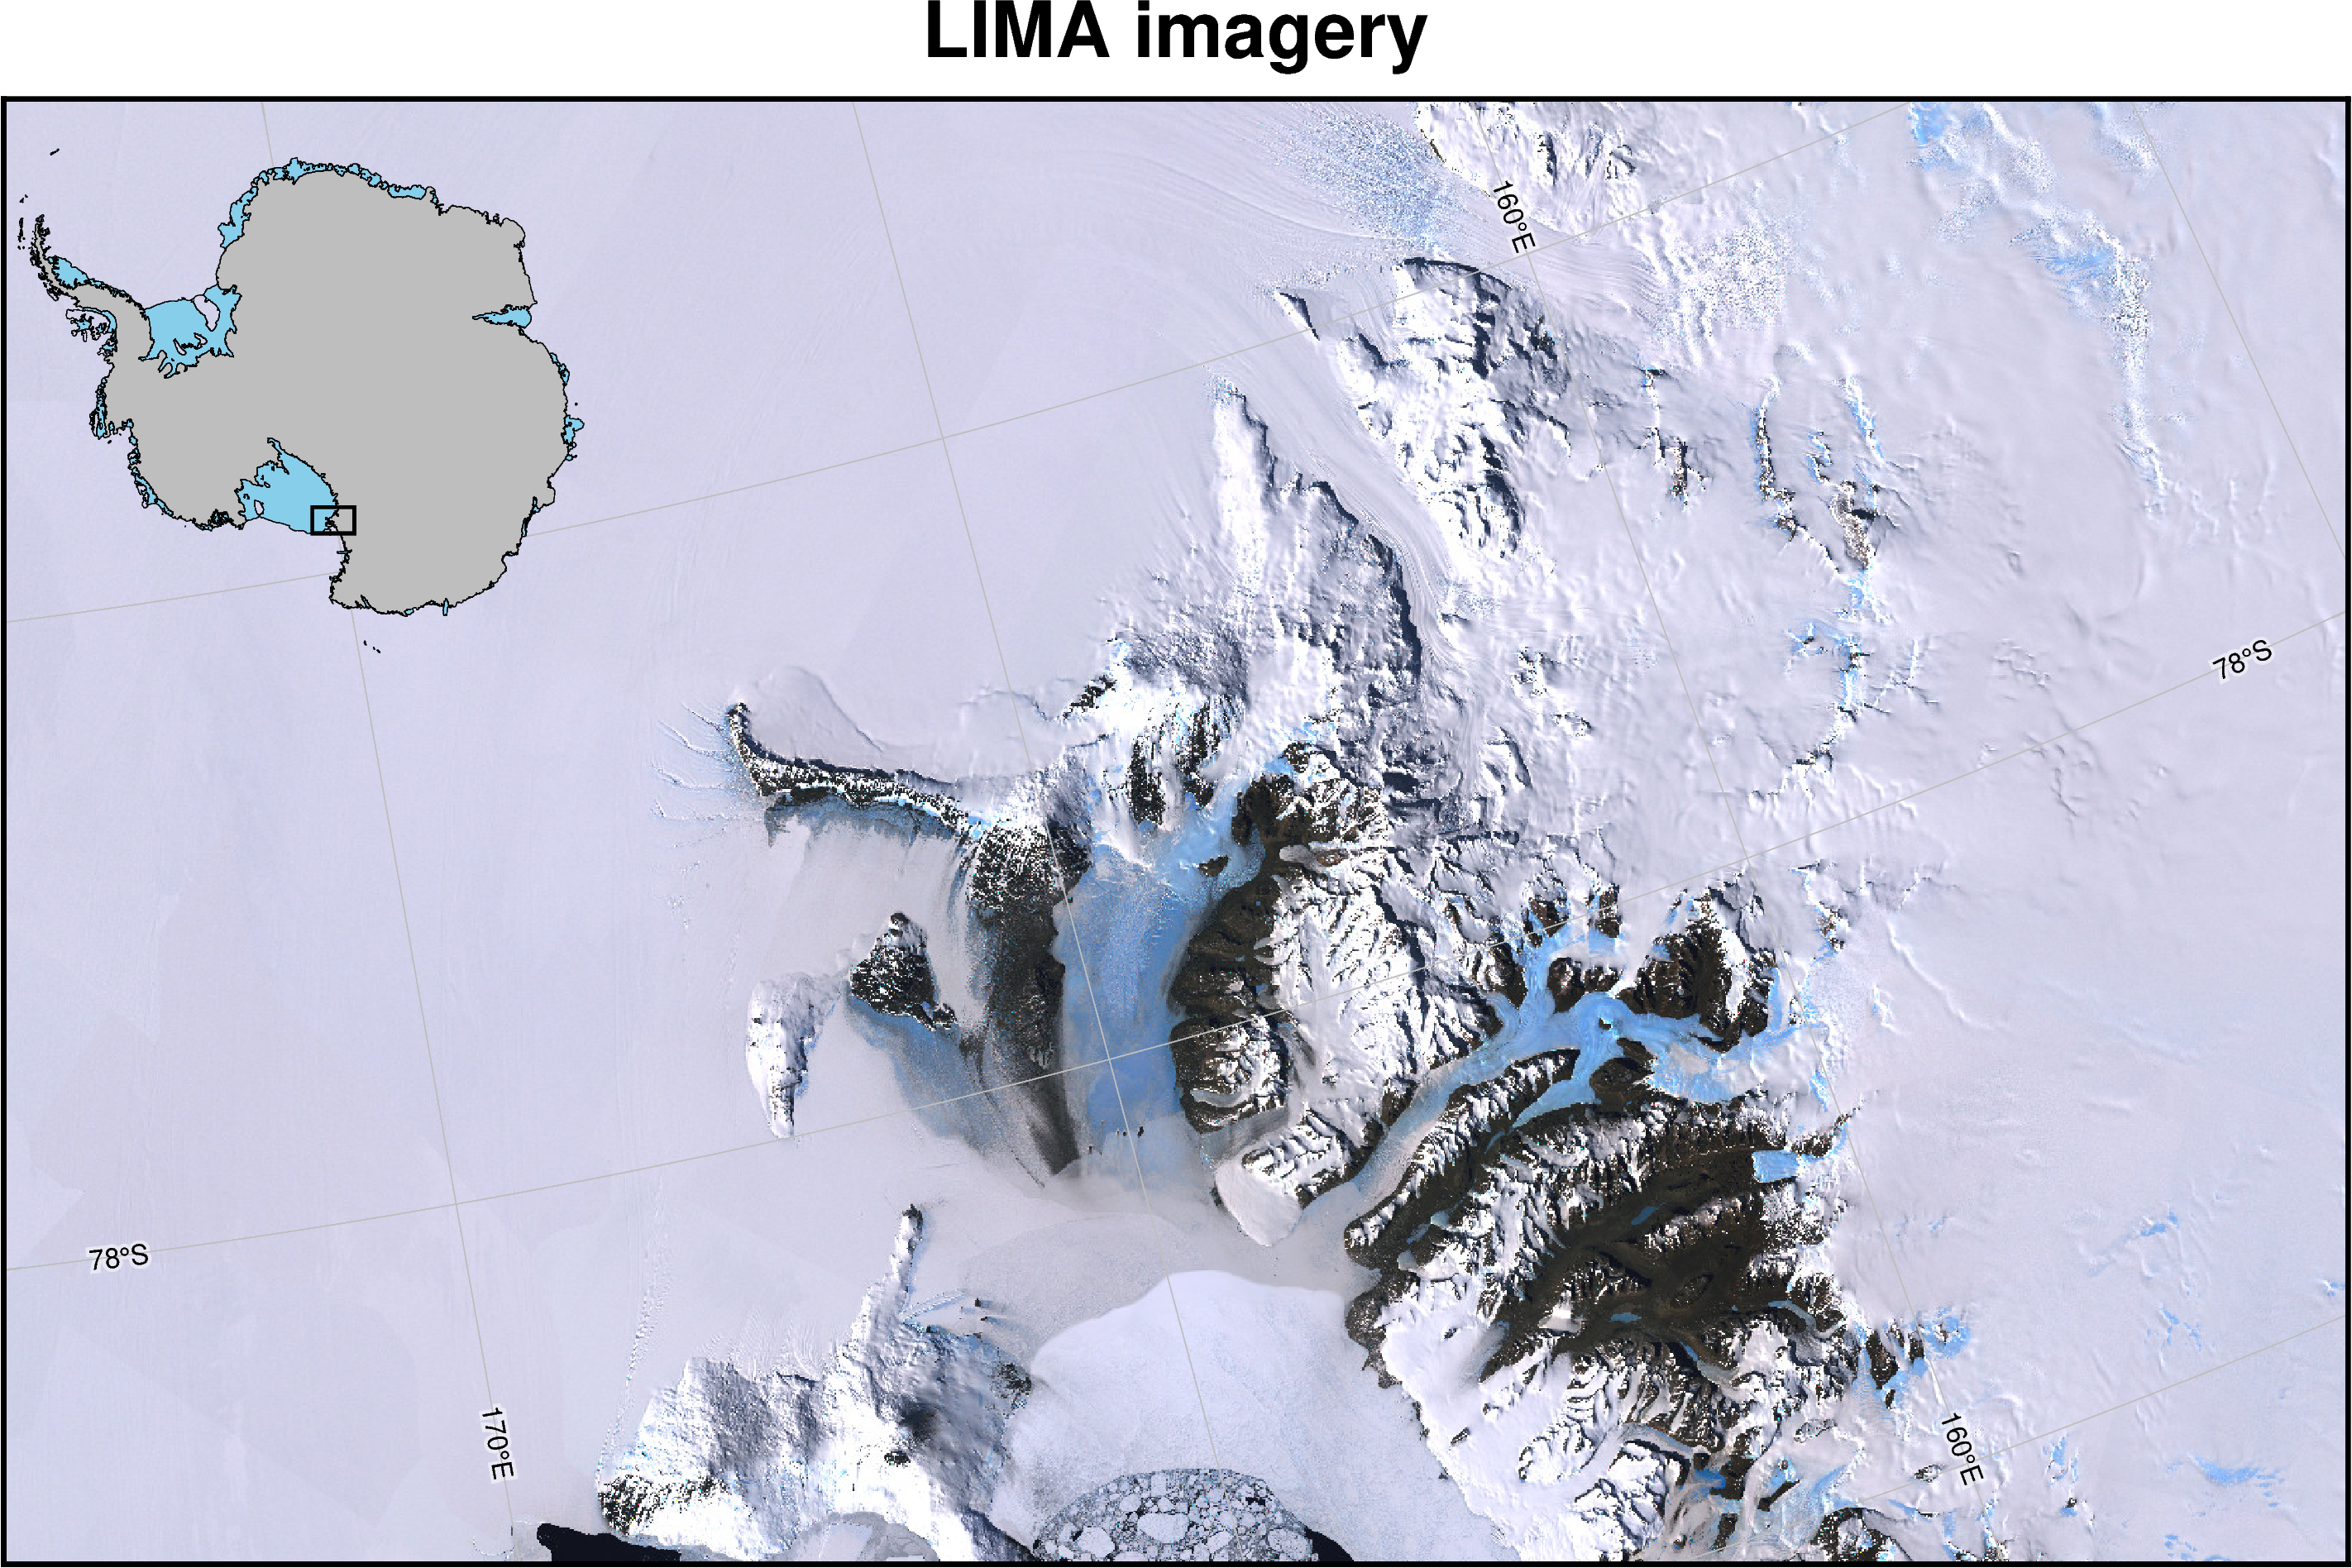

In [3]:
# define the region of interest
region = [150e3, 550e3, -1350e3, -1100e3]

# plot the imagery and some additonal map features
fig = maps.plot_grd(
    imagery,
    region=region,
    image=True,
    inset=True,
    title="LIMA imagery",
    gridlines=True,
    x_spacing=10,  # plot 10 degree longitude lines
    y_spacing=2,  # plot 2 degree latitude lines
)

fig.show()

Use additional PyGMT plotting methods on the figure

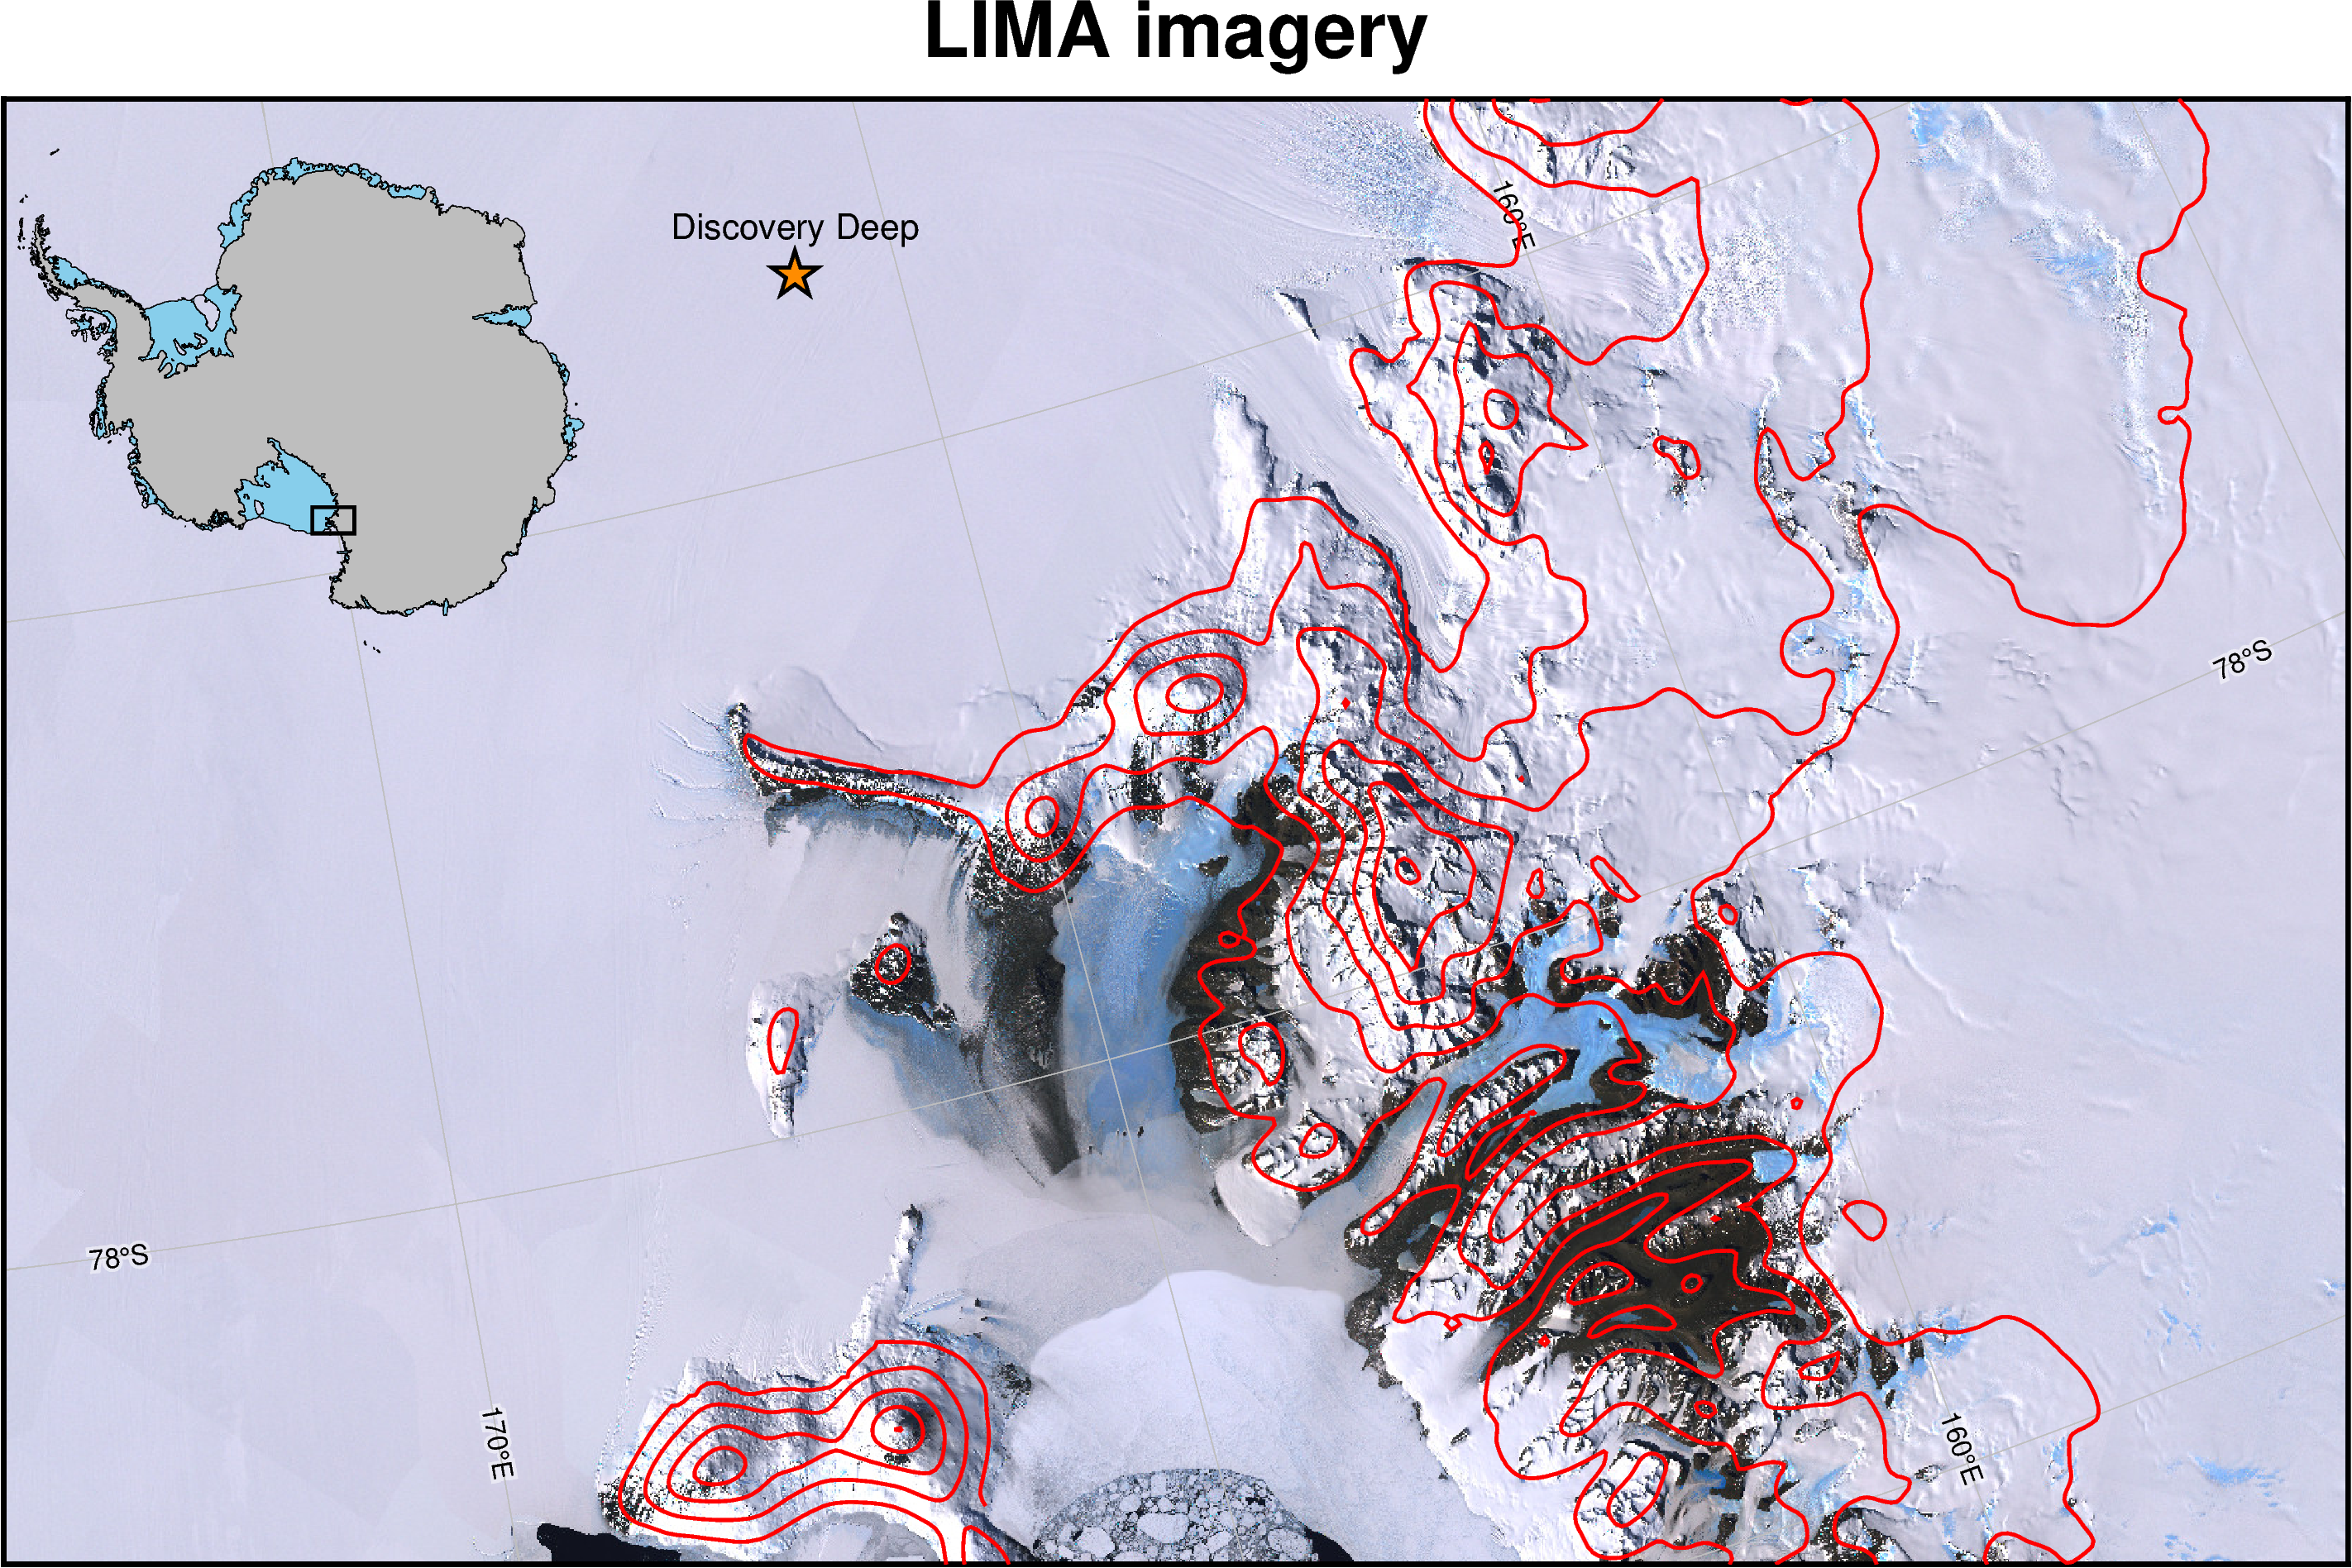

In [4]:
# add surface elevation contours
fig.grdcontour(grid=surface, interval=500, pen="thick,red")

# add a point and label
fig.plot(x=285000, y=-1130000, style="a0.5c", pen="1p,black", color="darkorange")
fig.text(x=285000, y=-1130000, text="Discovery Deep", offset="0c/.5c")

# save the figure to use in the Gallery examples
fig.savefig("outputs/extend_pygmt.png")

# show the figure
fig.show()